In [1]:
import os

In [2]:
os.chdir("/users/SABIOSF/Downloads/")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

In [4]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [5]:
X_train[0]

array([[[ 33,  84,  19, ...,  92, 190, 216],
        [ 30,  76,  54, ...,  78, 188, 217],
        [ 38,  59, 110, ..., 101, 191, 212]],

       [[ 15,  86,  20, ...,  94, 205, 221],
        [ 23,  73,  52, ...,  82, 203, 222],
        [ 19,  66, 111, ..., 105, 206, 217]],

       [[ 15,  77,  25, ..., 114, 220, 226],
        [ 17,  78,  57, ..., 101, 218, 227],
        [ 19,  56, 116, ..., 125, 220, 221]],

       ...,

       [[ 72,  90,  65, ..., 200, 229, 200],
        [ 65,  78, 144, ..., 201, 231, 199],
        [ 56,  69, 223, ..., 203, 224, 191]],

       [[ 82,  88,  78, ..., 192, 229, 193],
        [ 77,  77, 148, ..., 193, 229, 188],
        [ 57,  67, 218, ..., 195, 224, 182]],

       [[ 89,  88,  98, ..., 190, 229, 197],
        [ 79,  78, 158, ..., 191, 228, 189],
        [ 59,  66, 220, ..., 193, 223, 186]]], dtype=uint8)

In [6]:
y_train[0]

array([1], dtype=uint8)

In [7]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


In [8]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

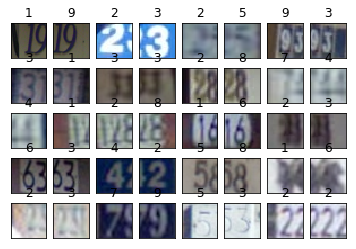

In [9]:
plot_images(X_train, y_train, 5,8)

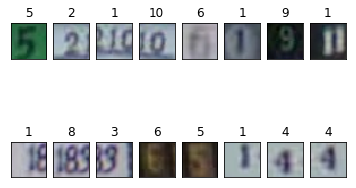

In [10]:
plot_images(X_test, y_test, 2, 8)

In [11]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


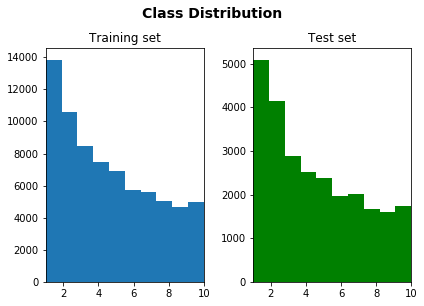

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

In [13]:
X_train.shape

(73257, 32, 32, 3)

In [14]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [15]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (73257, 32, 32, 3)
73257 train samples
26032 test samples


In [17]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7, stratify = y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7)

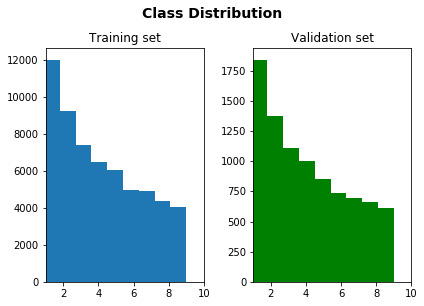

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation set")

fig.tight_layout()

In [19]:
y_train.shape, y_val.shape, y_test.shape

((63733,), (9524,), (26032,))

In [20]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(32,32,3),activation='relu',))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

In [ ]:
hist =model.fit(X_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 63733 samples, validate on 26032 samples
Epoch 1/5
32768/63733 [==============>...............] - ETA: 2:42 - loss: 1.4857 - acc: 0.5205

# Experimenting WIP

In [ ]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [ ]:
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
val_greyscale = rgb2gray(X_val).astype(np.float32)

In [ ]:
print("Training Set", train_greyscale.shape)
print("Validation Set", val_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('')

In [ ]:
del X_train, X_test, X_val

In [ ]:
plot_images(train_greyscale, y_train, 1, 10)

In [ ]:
# Calculate the mean on the training data
train_mean = np.mean(train_greyscale, axis=0)

# Calculate the std on the training data
train_std = np.std(train_greyscale, axis=0)

# Subtract it equally from all splits
train_greyscale_norm = (train_greyscale - train_mean) / train_std
test_greyscale_norm = (test_greyscale - train_mean)  / train_std
val_greyscale_norm = (val_greyscale - train_mean) / train_std

In [ ]:
import h5py

# Create file
h5f = h5py.File('SVHN_grey.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=train_greyscale_norm)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=test_greyscale_norm)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=val_greyscale_norm)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()

In [ ]:
# Open the file as readonly
h5f = h5py.File('SVHN_grey.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

In [ ]:
from keras.layers import Input, Dense

In [ ]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

In [ ]:
model.summary()

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(10, activation='softmax', name='output')(last_layer)

In [ ]:
from keras.models import Model

custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

In [ ]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [ ]:
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
hist = custom_vgg_model.fit(X_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, y_test))

In [ ]:
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))